In [1]:
!pip install japanize-matplotlib

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120258 sha256=40d760ada5c46f76ee506601925a1a3b2cf4ba4ab0799368dca6249a1880b082
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
x_train, x_test =  x_train/255.0, x_test/255.0

print(f"学習データ（問題画像）　： {x_train.shape}")
print(f"テストデータ（問題画像）　： {x_test.shape}")

170498071/170498071 [==============================] - 2s 0us/step
学習データ（問題画像）　： (50000, 32, 32, 3)
テストデータ（問題画像）　： (10000, 32, 32, 3)


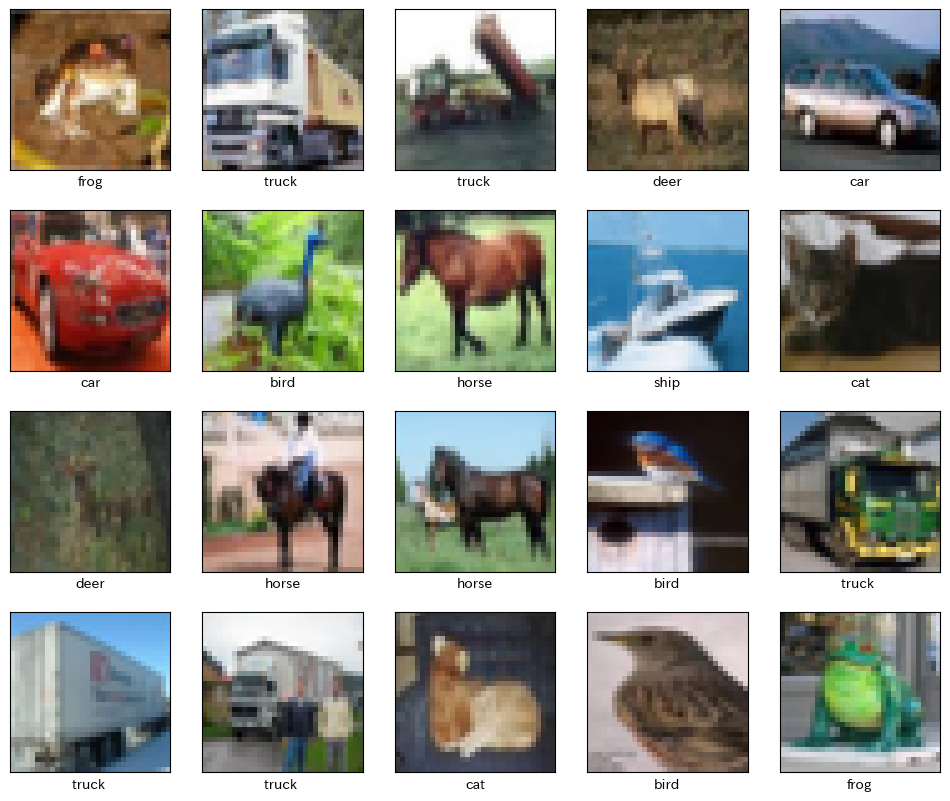

In [3]:
class_names = ["airplane", "car", "bird" , "cat", "deer",
               "dog", "frog", "horse", "ship", "truck "]

n_rows      = 4
n_columns   = 5
def display_data(x_data, y_data):
  plt.figure(figsize =(12,10))
  rows = n_rows
  columns  = n_columns
  for i in range(rows*columns):
    plt.subplot(rows, columns, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_data[i])
    plt.xlabel(class_names[y_data[i][0]])
  plt.show()
display_data(x_train, y_train)


In [9]:
# modelの作成 ドロップアウト層を含む。　（p.184）

# dropout layer はーー＞訓練データに過剰に適合してしまうことを防ぐ。ニューロンをランダムに削除する。ネットワーク全体の複雑さを減らす効果がある。

model = keras.models.Sequential()
model.add(layers.Conv2D(32,(5,5), activation ="relu" , input_shape =(32,32,3)))  #32*32のカラー画像を入力。　layers.Conv2Dとは？？--> 32枚の5*5のフィルターを使う。
model.add(layers.MaxPooling2D((2,2)))    #2*2の範囲に区切って小さくする。
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(5,5), activation ="relu"))   #Why 64枚のフィルター？
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation ="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation ="relu"))
model.add(layers.Dense(10,activation ="softmax"))
model.summary(line_length =120)

Model: "sequential_3"
________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           
 conv2d_5 (Conv2D)                                    (None, 28, 28, 32)                              2432              
                                                                                                                        
 max_pooling2d_3 (MaxPooling2D)                       (None, 14, 14, 32)                              0                 
                                                                                                                        
 dropout_3 (Dropout)                                  (None, 14, 14, 32)                              0                 
                                                                                                                        
 conv2d_6 

In [10]:
model.compile(optimizer="adam",                           #?What is Adam
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/50
1563/1563 [==============================] - 128s 81ms/step - loss: 1.7210 - accuracy: 0.3667 - val_loss: 1.4151 - val_accuracy: 0.4892
Epoch 2/50
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4097 - accuracy: 0.4926 - val_loss: 1.2349 - val_accuracy: 0.5560
Epoch 3/50
1563/1563 [==============================] - 120s 77ms/step - loss: 1.2940 - accuracy: 0.5364 - val_loss: 1.1379 - val_accuracy: 0.5970
Epoch 4/50
1563/1563 [==============================] - 131s 84ms/step - loss: 1.2101 - accuracy: 0.5689 - val_loss: 1.0909 - val_accuracy: 0.6205
Epoch 5/50
1563/1563 [==============================] - 177s 113ms/step - loss: 1.1447 - accuracy: 0.5916 - val_loss: 1.0304 - val_accuracy: 0.6350
Epoch 6/50
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0937 - accuracy: 0.6139 - val_loss: 1.0139 - val_accuracy: 0.6418
Epoch 7/50
1563/1563 [==============================] - 124s 79ms/step - loss: 1.0519 - accuracy: 0.6307 - val_loss: 

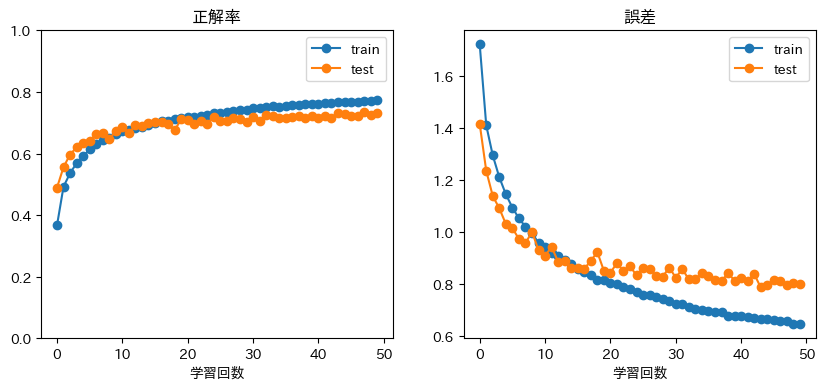

In [13]:
param = [["正解率" , "accuracy" , "val_accuracy"],
          ["誤差","loss" , "val_loss"]]

plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.title(param[i][0])      #
  plt.plot(history.history[param[i][1]] , "o-")
  plt.plot(history.history[param[i][2]] , "o-")
  plt.xlabel("学習回数")
  plt.legend(["train","test"] , loc ="best")
  if i==0:
    plt.ylim([0,1])
plt.show()

313/313 [==============================] - 6s 18ms/step


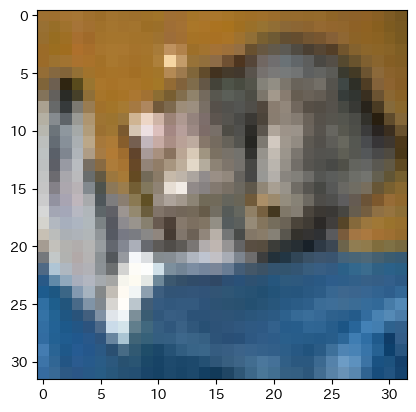

In [15]:
pre = model.predict(x_test)

i = 0
plt.imshow(x_test[i])
plt.show()

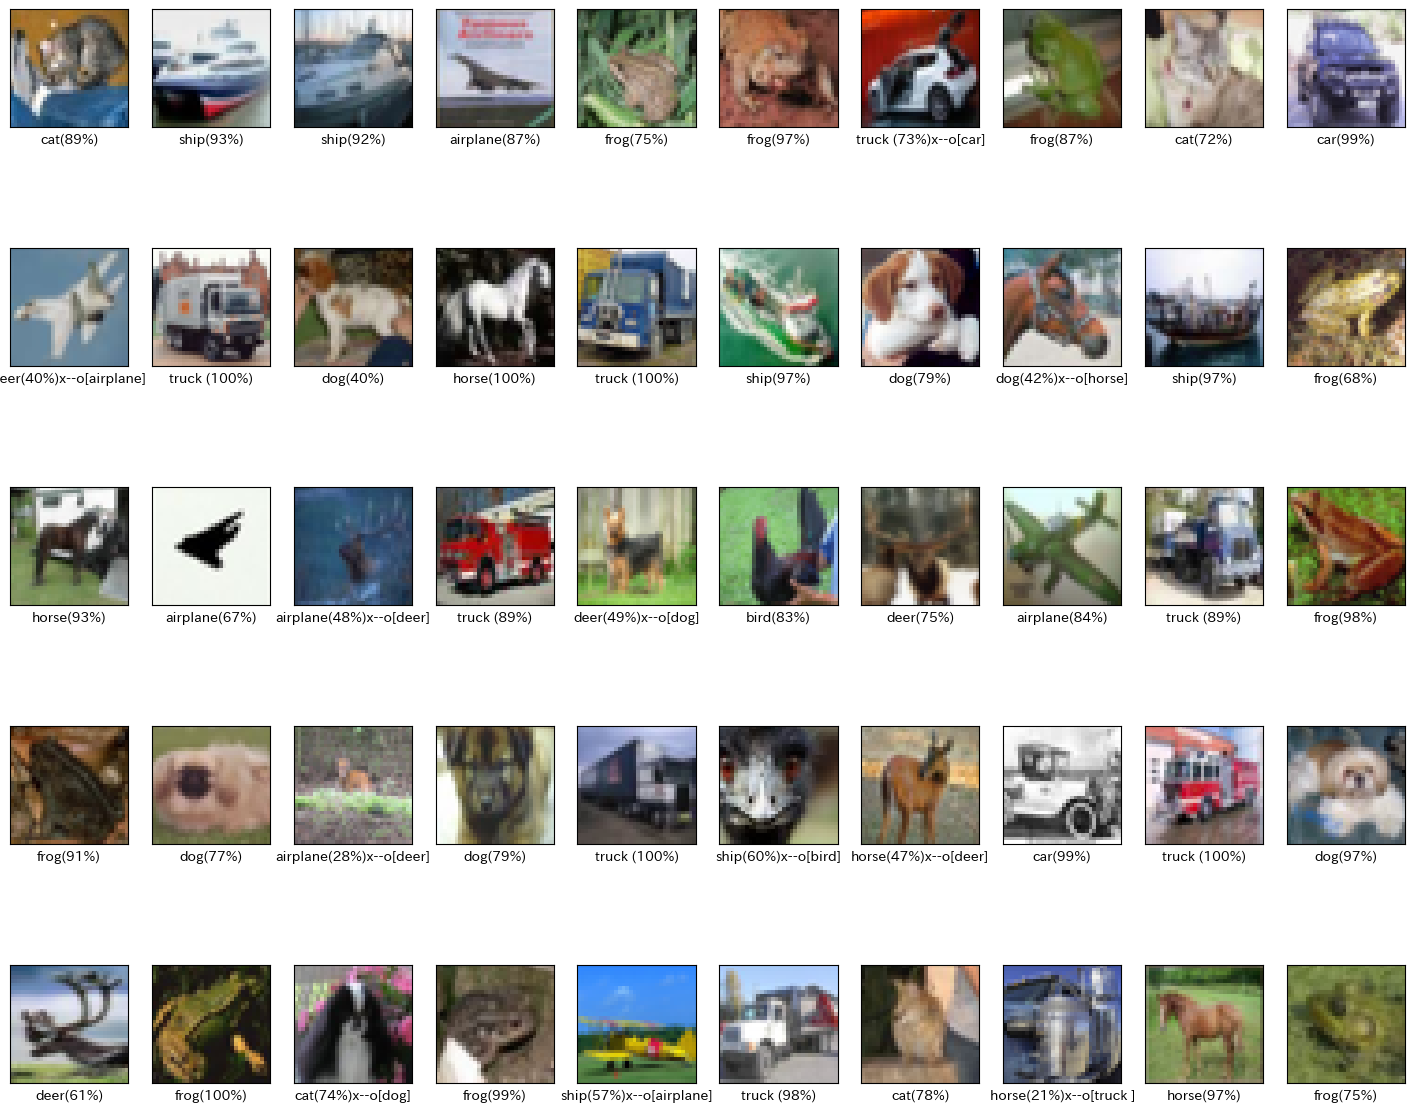

In [16]:
n_rows      =  5
n_columns   = 10
plt.figure(figsize=(18,15))
for i in range(n_rows*n_columns):
  plt.subplot(n_rows, n_columns, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap ="Greys")
  #
  index= np.argmax(pre[i])
  pct  = pre[i][index]
  ans  = ""
  if index != y_test[i]:
    ans = "x--o["+class_names[(y_test[i][0])]+"]"
  lbl = f"{class_names[index]}({pct:.0%}){ans}"
  plt.xlabel(lbl)
plt.show()

In [ ]:
2

In [18]:
## 中間層の視覚化(p189)

hidden_layers =[]
for i ,val in enumerate(model.layers):   # enmumerate(model.layers):   valで何が出てくるの？　いまいちわかっていない。
  print(f"{i} : {val.name}")
  hidden_layers.append(val.output)   #??


hidden_model =keras.models.Model(inputs =model.inputs, outputs =hidden_layers)   #
outputs = hidden_model.predict(x_test)                                             # output?

0 : conv2d_5
1 : max_pooling2d_3
2 : dropout_3
3 : conv2d_6
4 : max_pooling2d_4
5 : dropout_4
6 : flatten
7 : dense
8 : dropout_5
9 : dense_1
10 : dense_2
313/313 [==============================] - 6s 20ms/step


In [24]:
model

In [21]:
model.layers

In [22]:
enumerate(model.layers)

In [23]:
hidden_layers

[<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'dropout_3')>,
 <KerasTensor: shape=(None, 10, 10, 64) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'dropout_4')>,
 <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>,
 <KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dropout_5')>,
 <KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>]

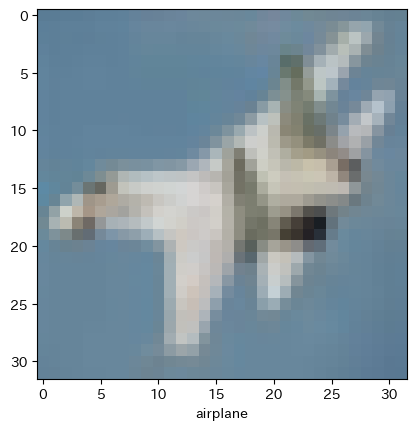

In [64]:
i = 10
plt.imshow(x_test[i])
plt.xlabel(class_names[y_test[i][0]])
plt.show()

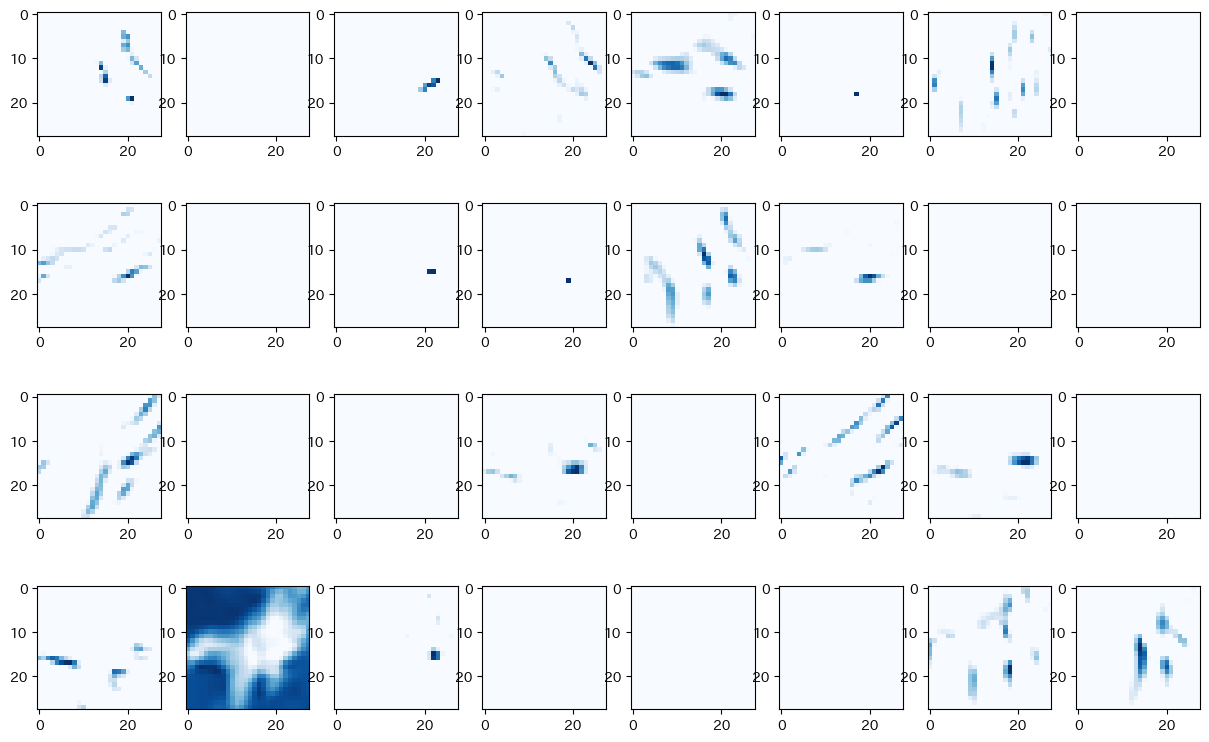

In [65]:
# 0番の畳み込み層で、どんな画像になっているのか？
def disp_hidden_data(data, w):    # data は画像のこと。　wはなんだ？
  plt.figure(figsize=(15,12))
  num = data.shape[2]         #
  for i in range(num):
    plt.subplot(int(num/w)+1,  w, i+1)
    plt.xticks()
    plt.yticks()
    plt.imshow(data[:,:,i], cmap="Blues")


# 0:conv2d
disp_hidden_data(outputs[0][i], 8)

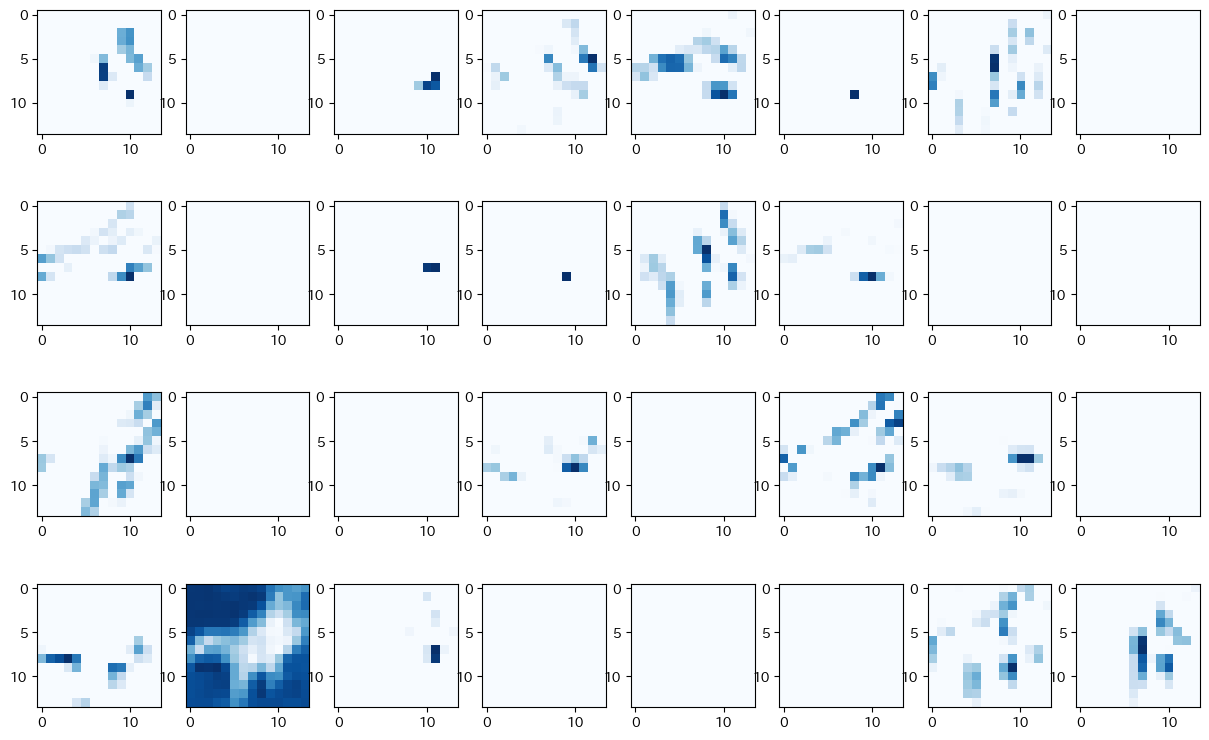

In [66]:
# 1: max_pooling2d
disp_hidden_data(outputs[1][i], 8)

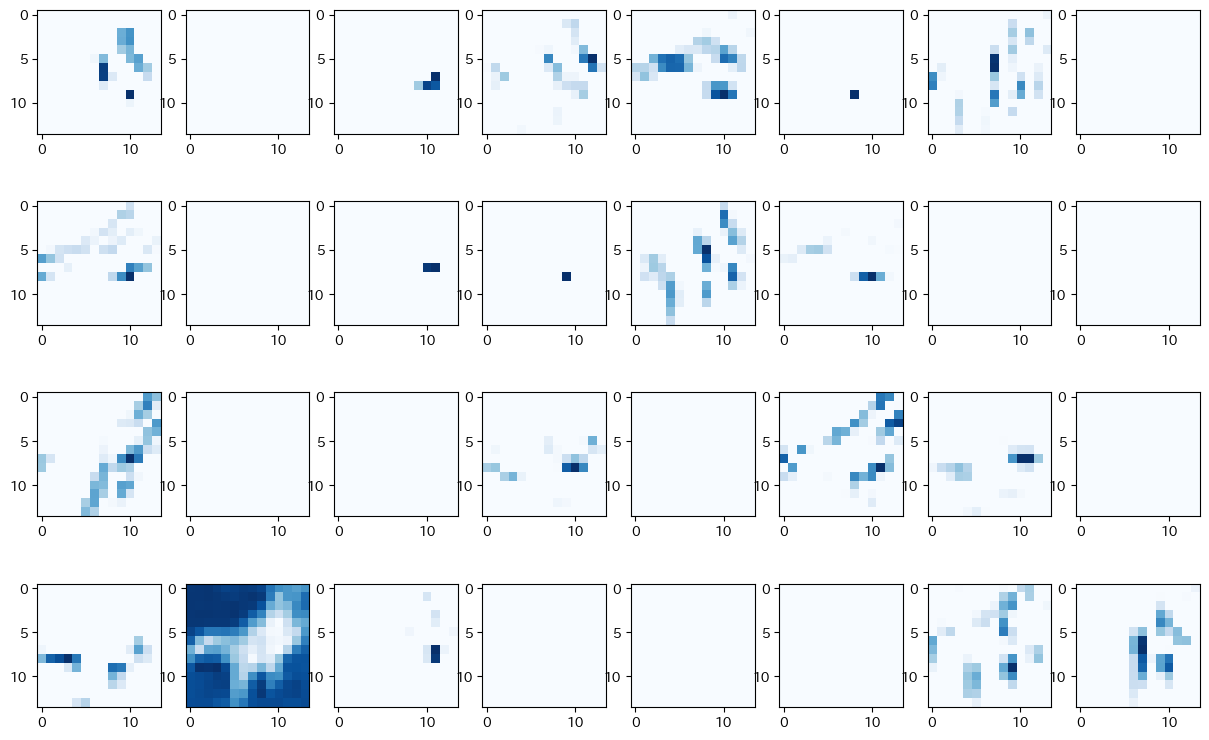

In [67]:
# 2 : dropout_3
# 3 : conv2d_6
# 4 : max_pooling2d_4
# 5 : dropout_4
# 6 : flatten
# 7 : dense
# 8 : dropout_5
# 9 : dense_1
# 10 : dense_2

# 2:  dropout_3
disp_hidden_data(outputs[2][i], 8)

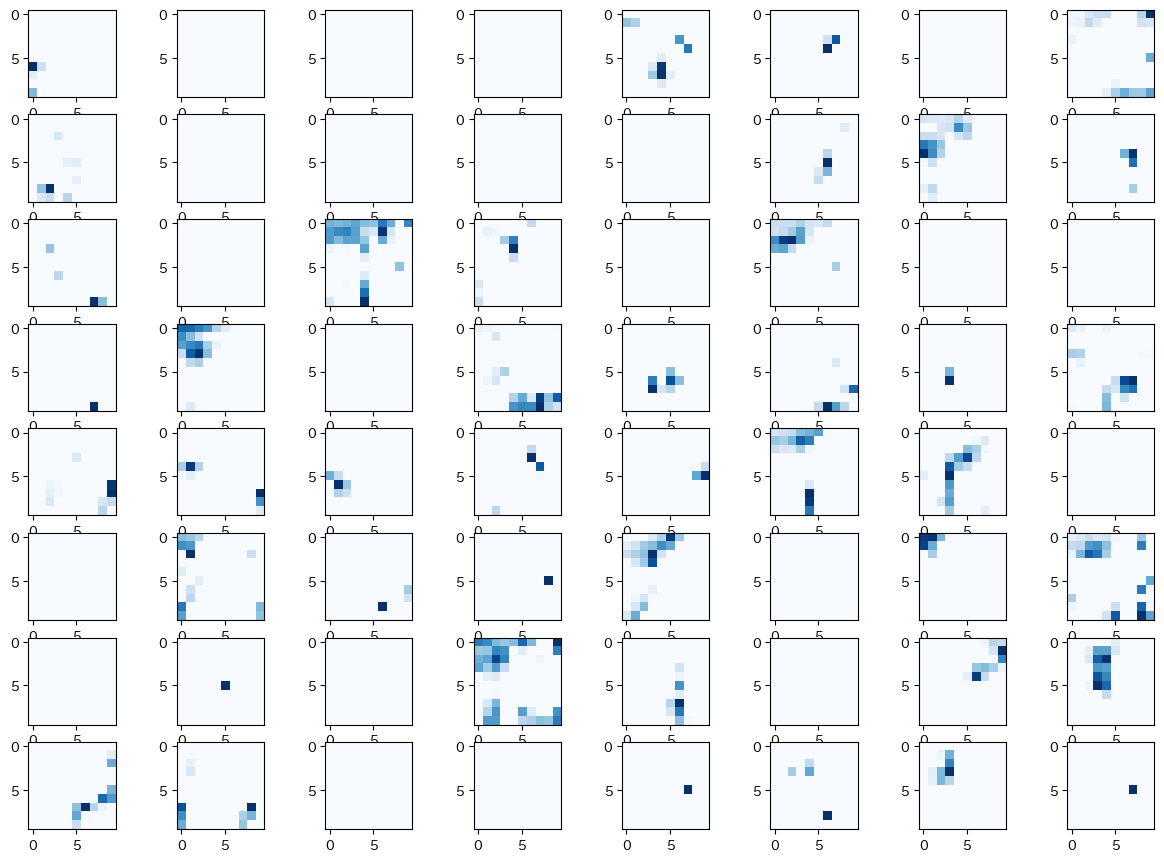

In [68]:
# 3 : conv2d_6

disp_hidden_data(outputs[3][i], 8)

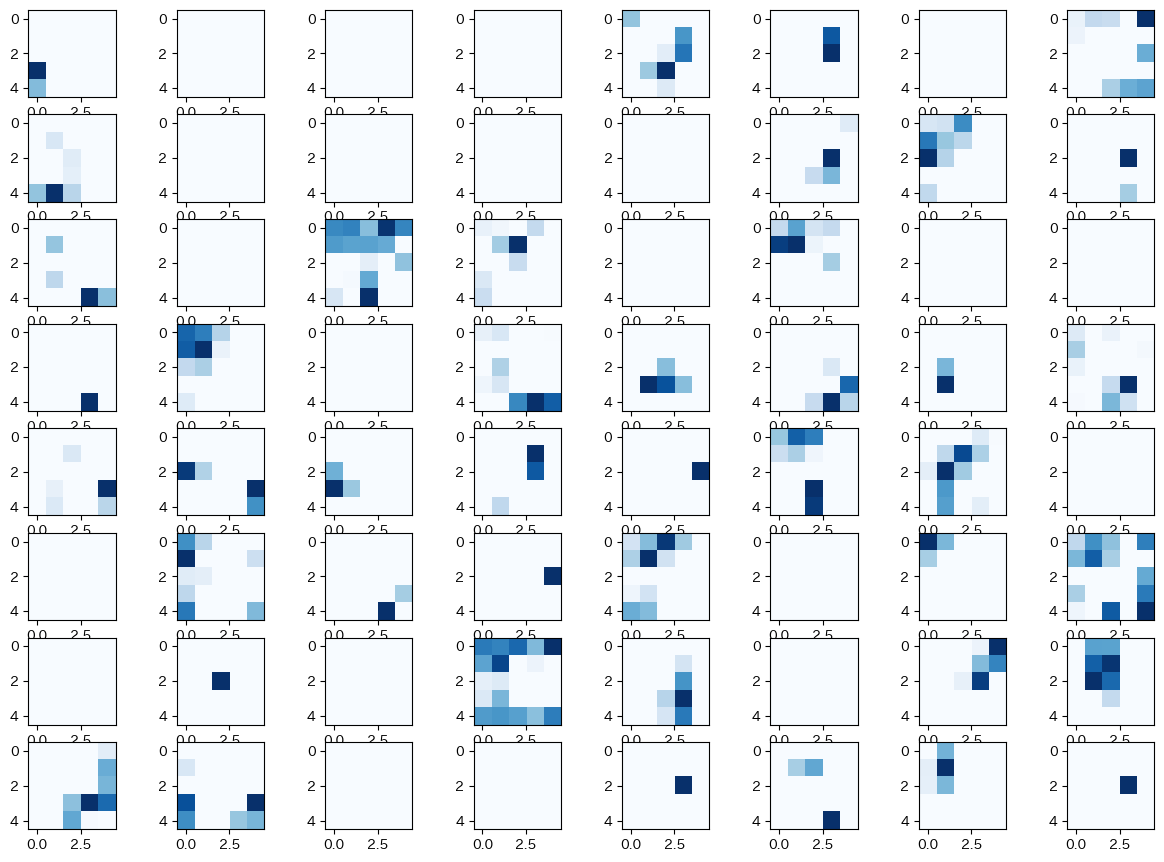

In [69]:
# 4 : max_pooling2d_4
disp_hidden_data(outputs[4][i], 8)

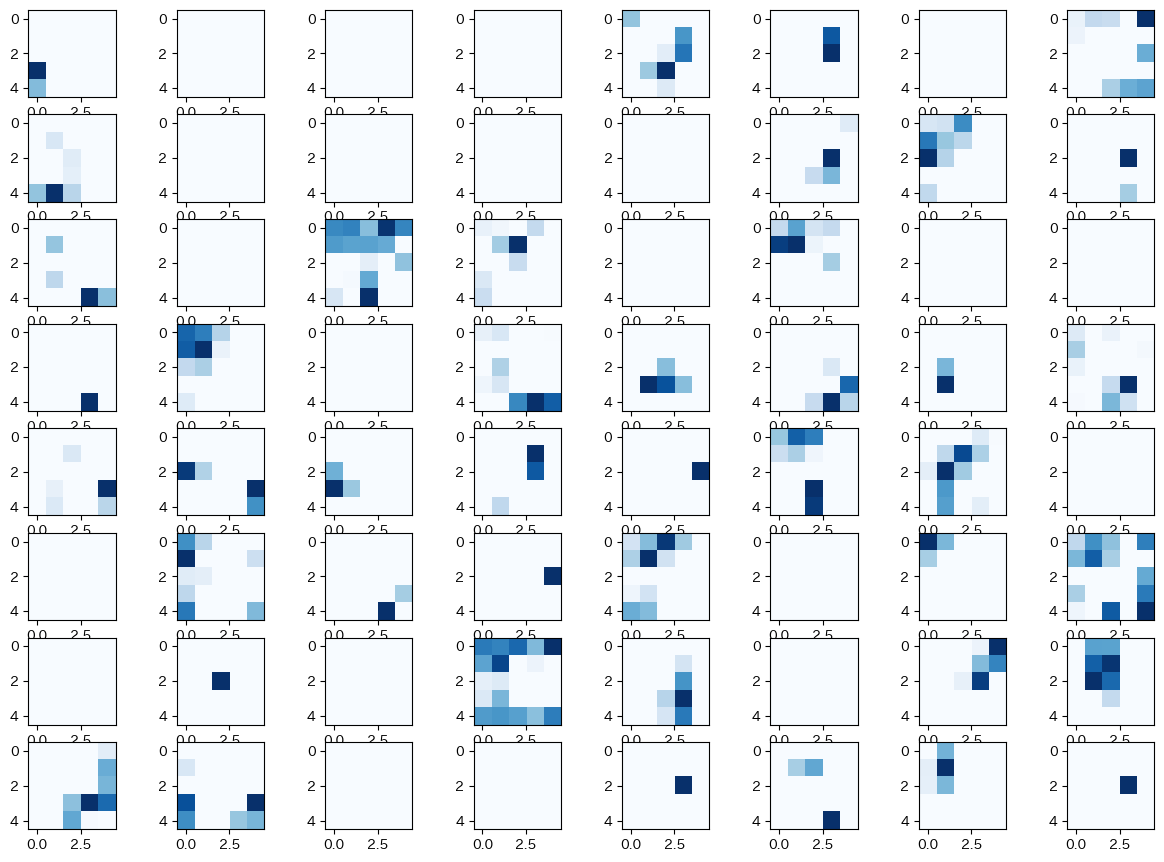

In [70]:
# 5 : dropout_4
disp_hidden_data(outputs[5][i], 8)

In [53]:
print(len(outputs))
print(len(outputs[0]))       #0~1０は中間層の数(=11層)。testの画像が1万枚
print(len(outputs[3][0]))    #0番目の層の場合、28*28になっている。　　（e.g.  １,2番目の層→14*14　  , 3番目の層→10*10　）
print(len(outputs[3][0][0])) #

11
10000
10
10


In [36]:
outputs[0][0][0][0]

array([0.2961034, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.6943535, 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       ], dtype=float32)

In [40]:
outputs[0][0].shape

(28, 28, 32)

In [41]:
outputs[0][0][:,:,1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0